In [1]:
# Importing nessary modules
import pandas as pd

In [2]:
# Data file path
data_path = './data/all_data.json'

In [3]:
# loading data into dataframe
df = pd.read_json(data_path)

In [4]:
# viewing first few rows
df.head()

,deviceId,channel,endTime,startTime,value,unit
0,2124549771,0,1631151000000,1631149200000,2.520,kWh
1,2124549771,0,1631149200000,1631147400000,2.290,kWh
2,2124549771,0,1631147400000,1631145600000,2.310,kWh
3,2124549771,0,1631145600000,1631143800000,2.432,kWh
4,2124549771,0,1631143800000,1631142000000,2.222,kWh


In [5]:
# viewing last few rows
df.tail()

,deviceId,channel,endTime,startTime,value,unit
3067,2124549771,0,1625542200000,1625540400000,2.944,kWh
3068,2124549771,0,1625540400000,1625538600000,2.838,kWh
3069,2124549771,0,1625538600000,1625536800000,2.850,kWh
3070,2124549771,0,1625536800000,1625535000000,2.868,kWh
3071,2124549771,0,1625535000000,1625533200000,2.728,kWh


In [6]:
# size of the data frame
df.shape

(3072, 6)

In [7]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deviceId   3072 non-null   int64  
 1   channel    3072 non-null   int64  
 2   endTime    3072 non-null   int64  
 3   startTime  3072 non-null   int64  
 4   value      3072 non-null   float64
 5   unit       3072 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 144.1+ KB


In [8]:
# df.iloc[:, 2:4] = df.iloc[:, 2:4].apply(pd.to_datetime, errors='coerce')
# convert type of time field for easy access
df["endTime"] = pd.to_datetime(df["endTime"], unit="ms")

In [9]:
df["startTime"] = pd.to_datetime(df["startTime"], unit="ms")

In [10]:
# checking the datatype and information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   deviceId   3072 non-null   int64         
 1   channel    3072 non-null   int64         
 2   endTime    3072 non-null   datetime64[ns]
 3   startTime  3072 non-null   datetime64[ns]
 4   value      3072 non-null   float64       
 5   unit       3072 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 144.1+ KB


In [11]:
df.head()

,deviceId,channel,endTime,startTime,value,unit
0,2124549771,0,2021-09-09 01:30:00,2021-09-09 01:00:00,2.520,kWh
1,2124549771,0,2021-09-09 01:00:00,2021-09-09 00:30:00,2.290,kWh
2,2124549771,0,2021-09-09 00:30:00,2021-09-09 00:00:00,2.310,kWh
3,2124549771,0,2021-09-09 00:00:00,2021-09-08 23:30:00,2.432,kWh
4,2124549771,0,2021-09-08 23:30:00,2021-09-08 23:00:00,2.222,kWh


In [12]:
df.tail()

,deviceId,channel,endTime,startTime,value,unit
3067,2124549771,0,2021-07-06 03:30:00,2021-07-06 03:00:00,2.944,kWh
3068,2124549771,0,2021-07-06 03:00:00,2021-07-06 02:30:00,2.838,kWh
3069,2124549771,0,2021-07-06 02:30:00,2021-07-06 02:00:00,2.850,kWh
3070,2124549771,0,2021-07-06 02:00:00,2021-07-06 01:30:00,2.868,kWh
3071,2124549771,0,2021-07-06 01:30:00,2021-07-06 01:00:00,2.728,kWh


In [13]:
# check how many device in the dataset
df["deviceId"].value_counts()

2124549771    3072
Name: deviceId, dtype: int64

#### the dataframe contain only one device so we can remove device id column for further processing

In [14]:
# Deleting columns
df.drop(columns=["deviceId", "unit", "channel", "startTime"], inplace=True)

In [15]:
df.head()

,endTime,value
0,2021-09-09 01:30:00,2.520
1,2021-09-09 01:00:00,2.290
2,2021-09-09 00:30:00,2.310
3,2021-09-09 00:00:00,2.432
4,2021-09-08 23:30:00,2.222


In [16]:
# change column name
df.rename(columns={"endTime": "time"}, inplace=True) 

In [17]:
df.sample()

,time,value
1320,2021-08-12 13:00:00,2.846


In [18]:
# Converting 1/2 hr data into hourly data by merging columns
df = df.groupby(pd.Grouper(key="time", axis=0, 
                      freq='H')).sum()

In [20]:
df.shape

(1561, 1)

In [21]:
df.sample()

,value
time,
2021-07-10 12:00:00,5.632


In [22]:
from matplotlib import pyplot as plt

<AxesSubplot:title={'center':'AVM Bolton'}, xlabel='time'>

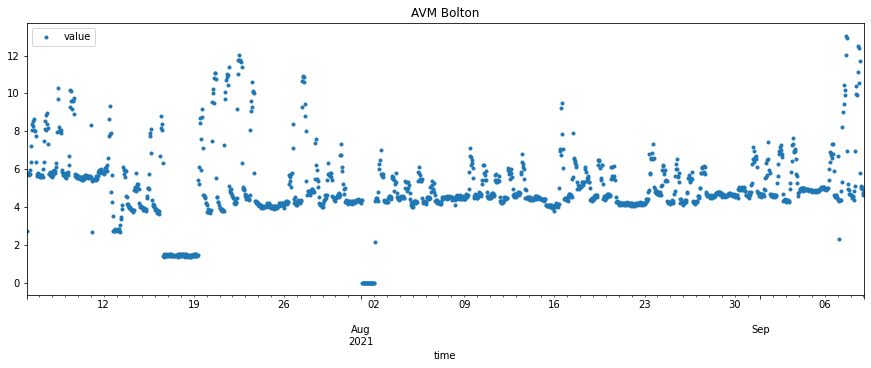

In [23]:
df.plot(style='.', figsize=(15, 5), title="AVM Bolton")

<AxesSubplot:title={'center':'AVM Bolton'}, xlabel='time'>

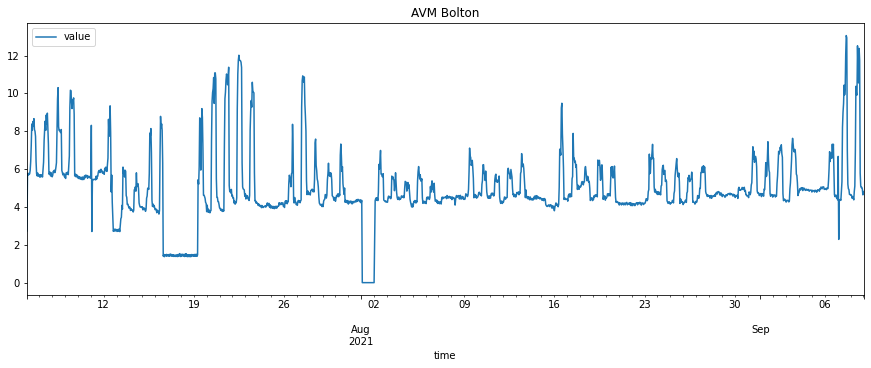

In [24]:
df.plot(style='-', figsize=(15, 5), title="AVM Bolton")

In [25]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.isocalendar().week

In [26]:
df.head()

,value,date,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,
2021-07-06 01:00:00,2.728,2021-07-06 01:00:00,1,1,7,2021,187,6,27
2021-07-06 02:00:00,5.718,2021-07-06 02:00:00,2,1,7,2021,187,6,27
2021-07-06 03:00:00,5.782,2021-07-06 03:00:00,3,1,7,2021,187,6,27
2021-07-06 04:00:00,5.688,2021-07-06 04:00:00,4,1,7,2021,187,6,27
2021-07-06 05:00:00,5.762,2021-07-06 05:00:00,5,1,7,2021,187,6,27


In [27]:
df.tail()

,value,date,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,
2021-09-08 21:00:00,5.034,2021-09-08 21:00:00,21,2,9,2021,251,8,36
2021-09-08 22:00:00,4.946,2021-09-08 22:00:00,22,2,9,2021,251,8,36
2021-09-08 23:00:00,4.640,2021-09-08 23:00:00,23,2,9,2021,251,8,36
2021-09-09 00:00:00,4.742,2021-09-09 00:00:00,0,3,9,2021,252,9,36
2021-09-09 01:00:00,4.810,2021-09-09 01:00:00,1,3,9,2021,252,9,36


In [28]:
df.isna().sum(axis=0)

value         0
date          0
hour          0
dayofweek     0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
dtype: int64

In [29]:
import seaborn as sns

In [69]:
sns.set(rc={'figure.figsize':(12,10)})

<AxesSubplot:xlabel='hour', ylabel='value'>

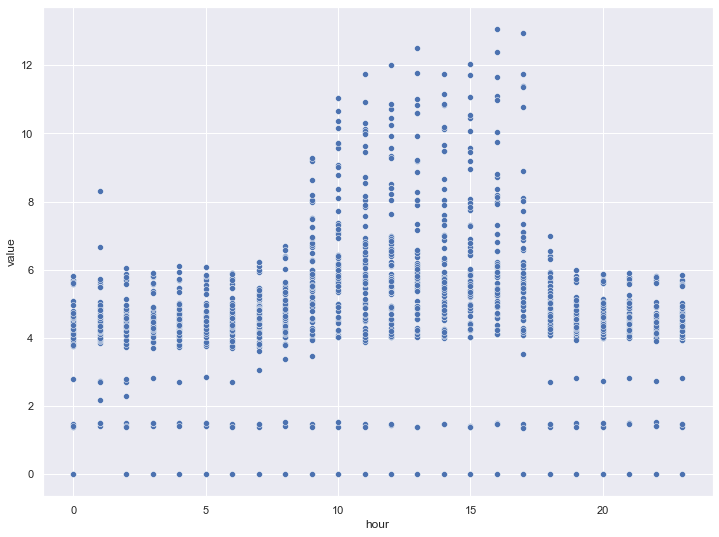

In [31]:
sns.scatterplot(x="hour", y="value", data=df)

<AxesSubplot:xlabel='dayofweek', ylabel='value'>

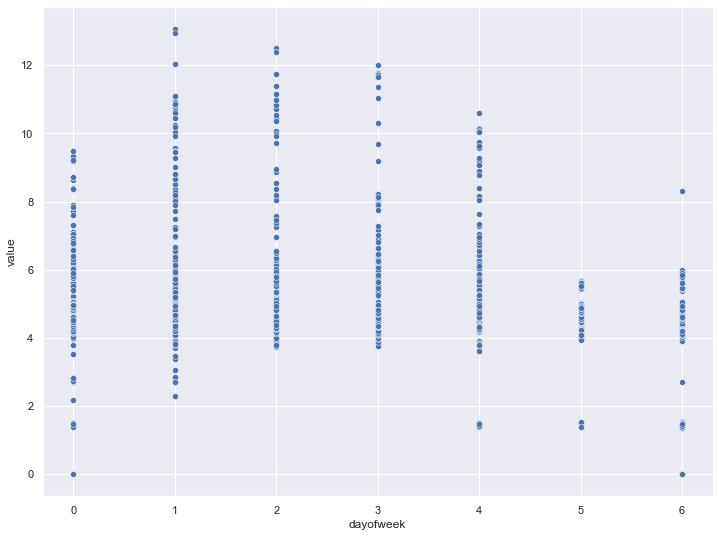

In [32]:
sns.scatterplot(x='dayofweek',y='value', data=df)

<AxesSubplot:xlabel='dayofweek', ylabel='value'>

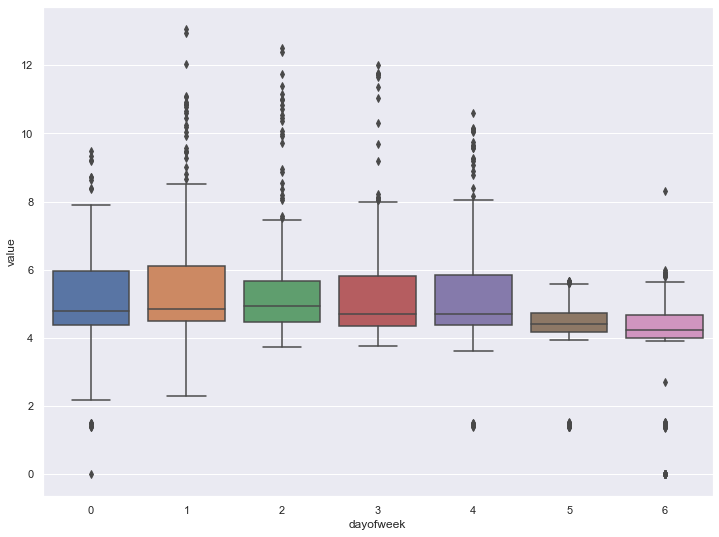

In [40]:
sns.boxplot(x='dayofweek',y='value', data=df)

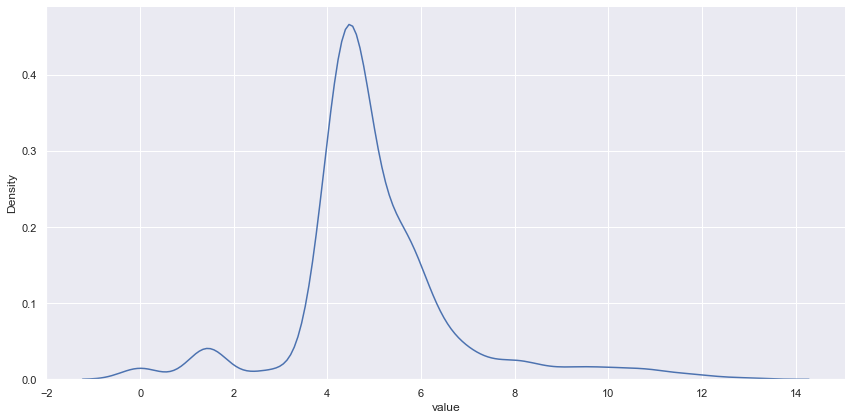

In [77]:
sns.displot(x='value', data=df, kind="kde", height=6, aspect=2)

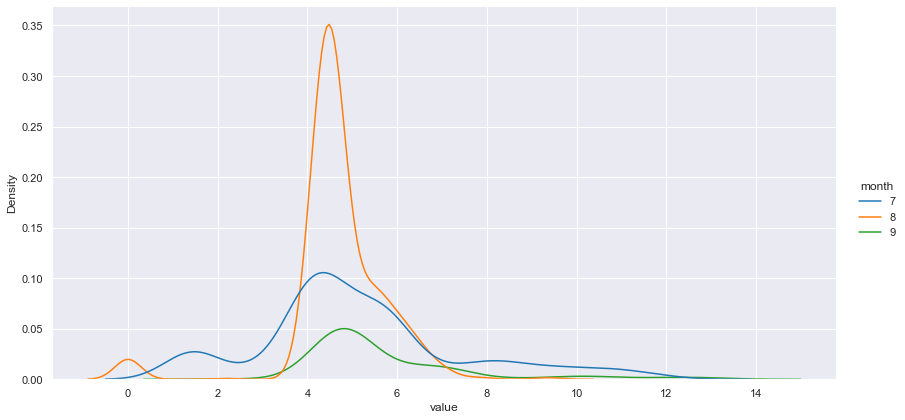

In [78]:
sns.displot(data=df, x="value", hue="month", kind="kde", palette="tab10", height=6, aspect=2)

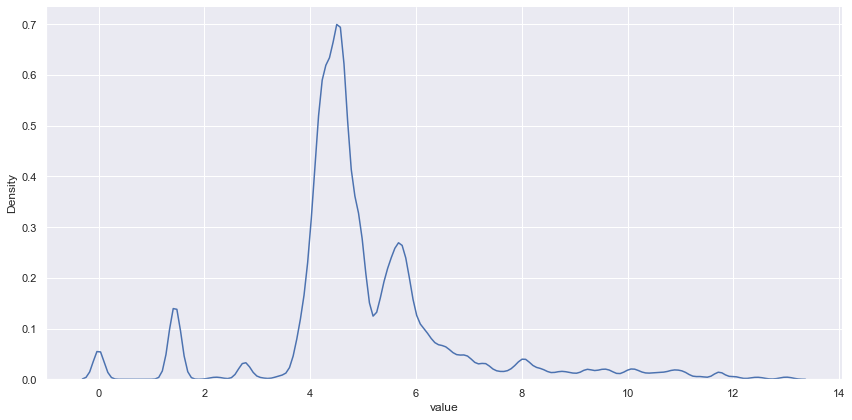

In [79]:
sns.displot(x='value', data=df, kind="kde",bw_adjust=.25, height=6, aspect=2)

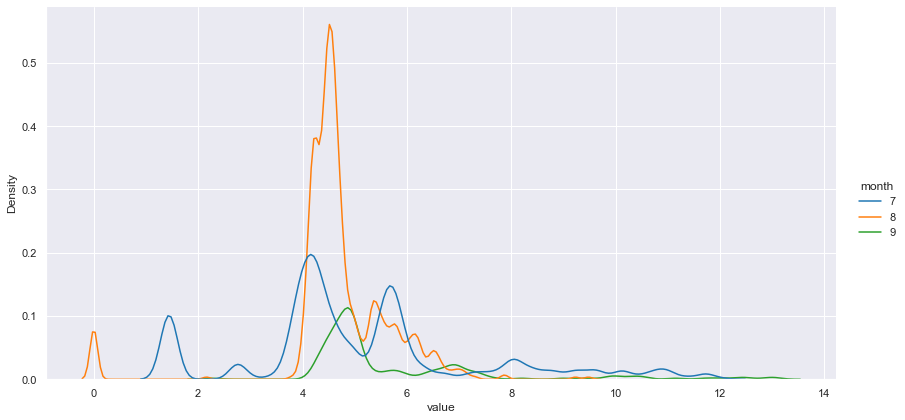

In [80]:
sns.displot(data=df, x="value", hue="month", kind="kde", bw_adjust=.25, palette="tab10", height=6, aspect=2)

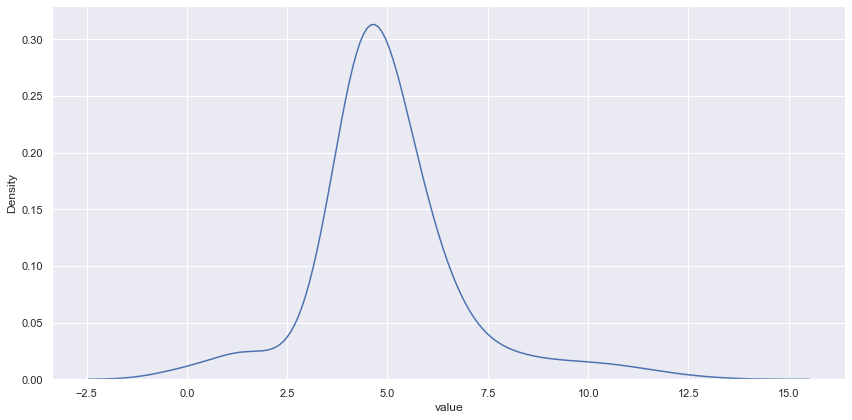

In [81]:
sns.displot(x='value', data=df, kind="kde",bw_adjust=2, height=6, aspect=2)

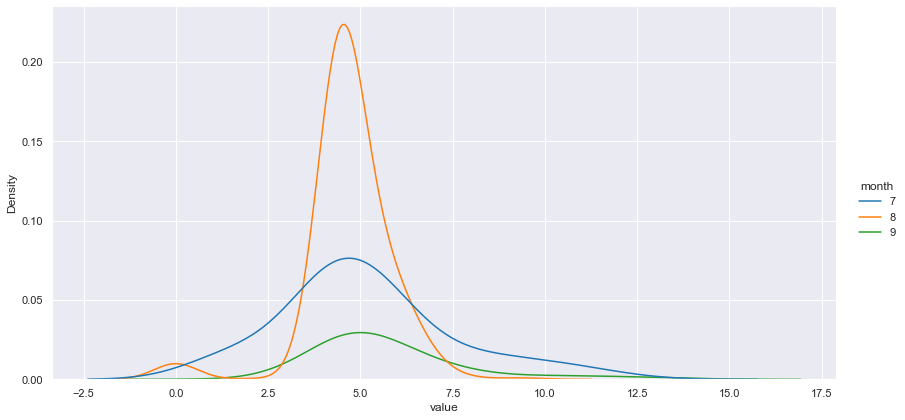

In [82]:
sns.displot(data=df, x="value", hue="month", kind="kde", bw_adjust=2, palette="tab10", height=6, aspect=2)

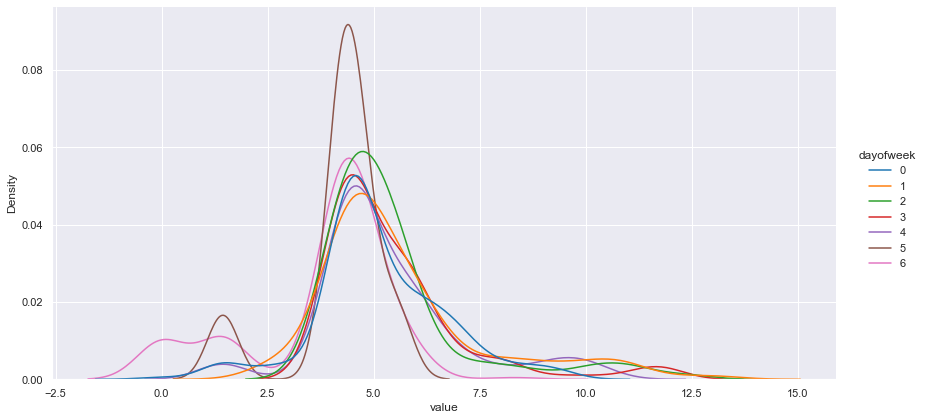

In [83]:
sns.displot(data=df, x="value", hue="dayofweek", kind="kde", palette="tab10", height=6, aspect=2)

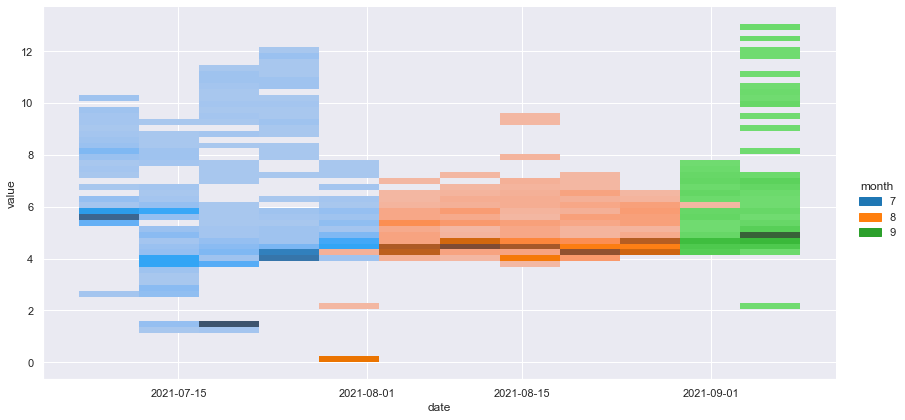

In [84]:
sns.displot(data=df, x="date", y="value", hue="month", palette="tab10", height=6, aspect=2)

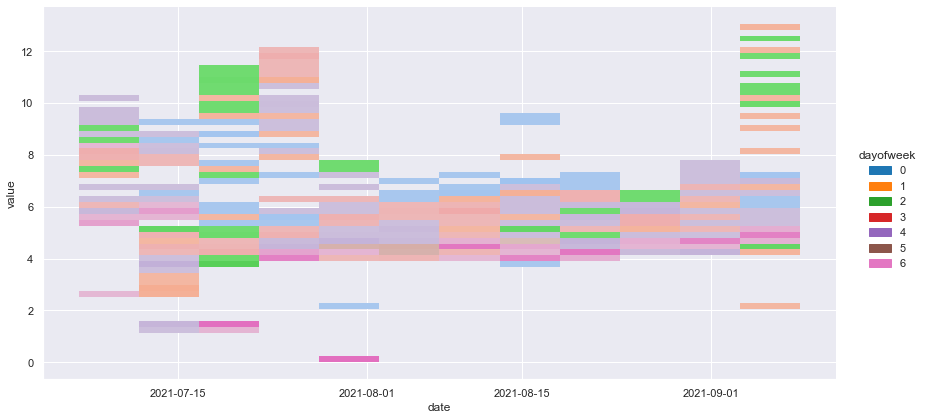

In [87]:
sns.displot(data=df, x="date", y="value", hue="dayofweek", palette="tab10", height=6, aspect=2)

<AxesSubplot:xlabel='month', ylabel='value'>

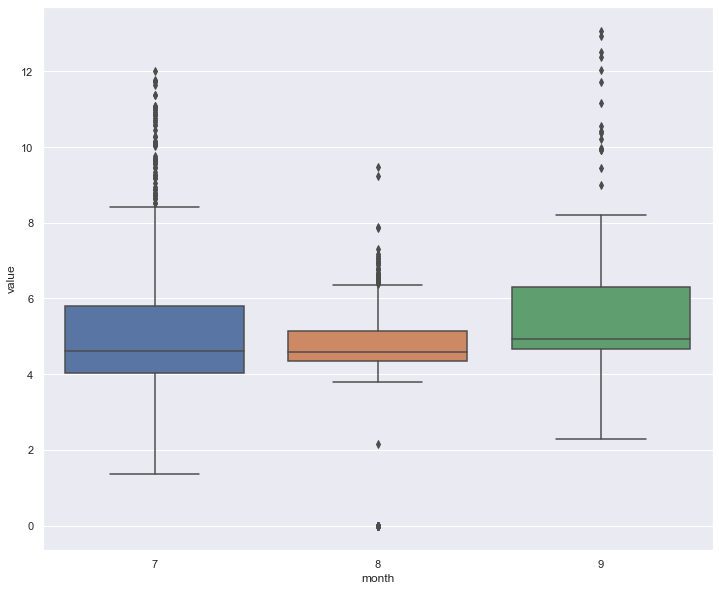

In [86]:
sns.boxplot(x='month',y='value', data=df)

<AxesSubplot:xlabel='weekofyear', ylabel='value'>

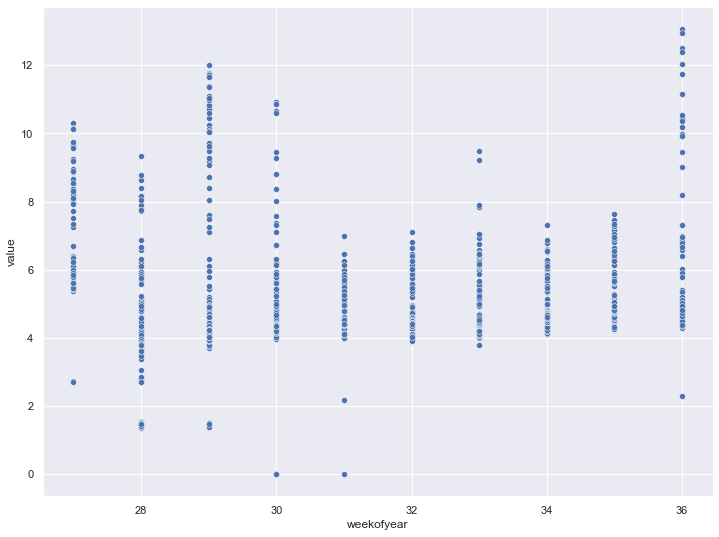

In [34]:
sns.scatterplot(x='weekofyear',y='value', data=df)

<AxesSubplot:xlabel='dayofyear', ylabel='value'>

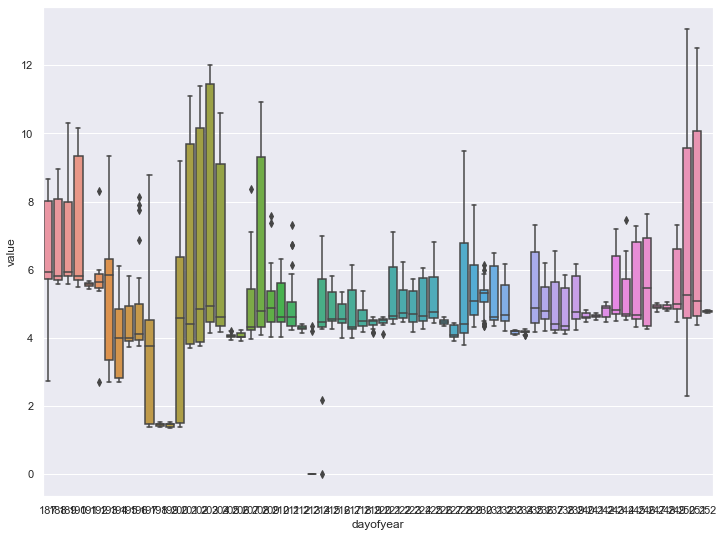

In [37]:
sns.boxplot(x='dayofyear',y='value', data=df)

things to do

* adding seasons column
* adding weekend, weekday
* adding holidays
* adding weather information